# LIGO - Gravitational Waves Detectability

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks")
from Utilities import plot_settings

Load downsampled data with balanced classes members

In [2]:
y = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\y_ds_100k.npy")

In [3]:
data = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\data_ds_100k.npy")

In [4]:
keys = np.load(r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\Notebooks\Exam\LIGO\Npy\keys_100k.npy")

Text(0.5, 1.0, 'Boxplots of Features')

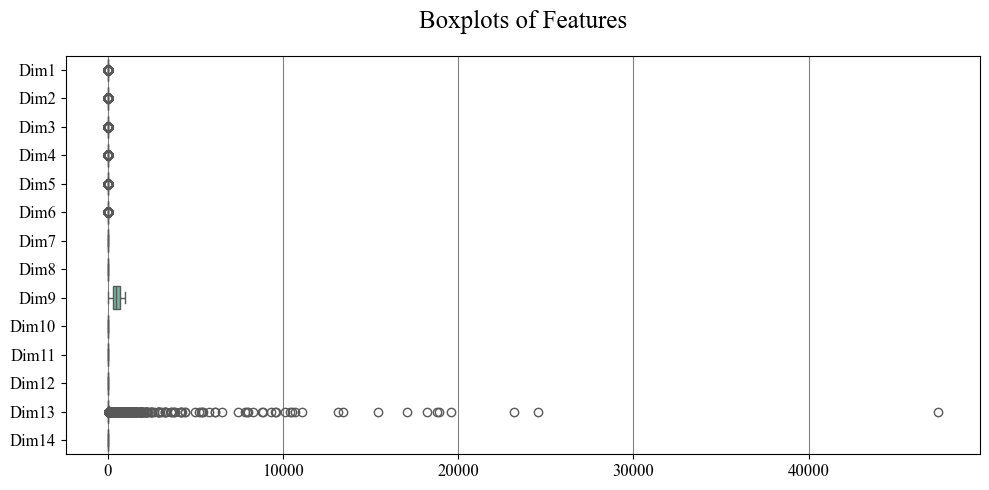

In [25]:
import seaborn as sns
import pandas as pd

# Convert to DataFrame for easier inspection
df = pd.DataFrame(data, columns=[f'Dim{i}' for i in range(1, 15)])

# Plot distributions
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Features")

Seems like all the data are aligned with the $13^{th}$ dimension

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [6]:
S = StandardScaler().fit_transform(data)
R = RobustScaler().fit_transform(data)

In [7]:
df = pd.DataFrame(S, columns=[f'Dim{i}' for i in range(1, 15)])

# Plot distributions
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Standard Scaling")

NameError: name 'sns' is not defined

Text(0.5, 1.0, 'Robust scaling')

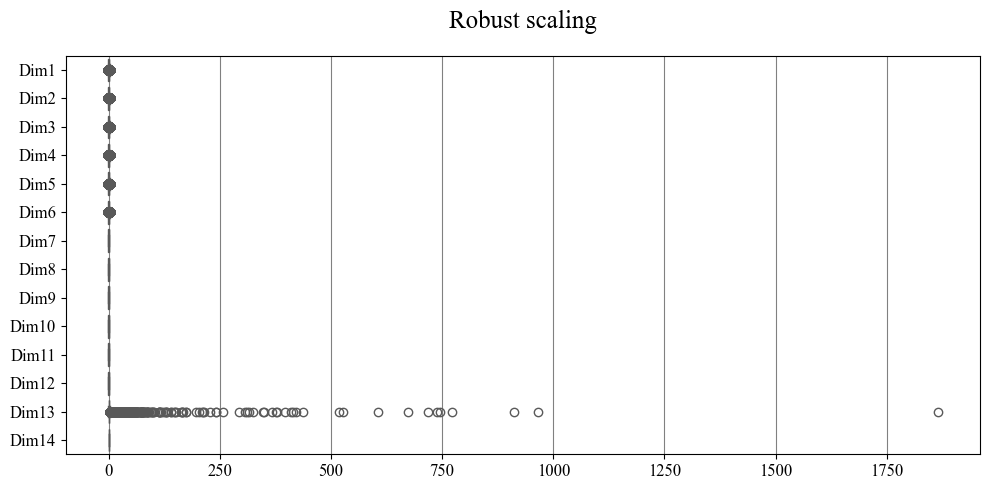

In [31]:
df = pd.DataFrame(R, columns=[f'Dim{i}' for i in range(1, 15)])

# Plot distributions
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Robust scaling")

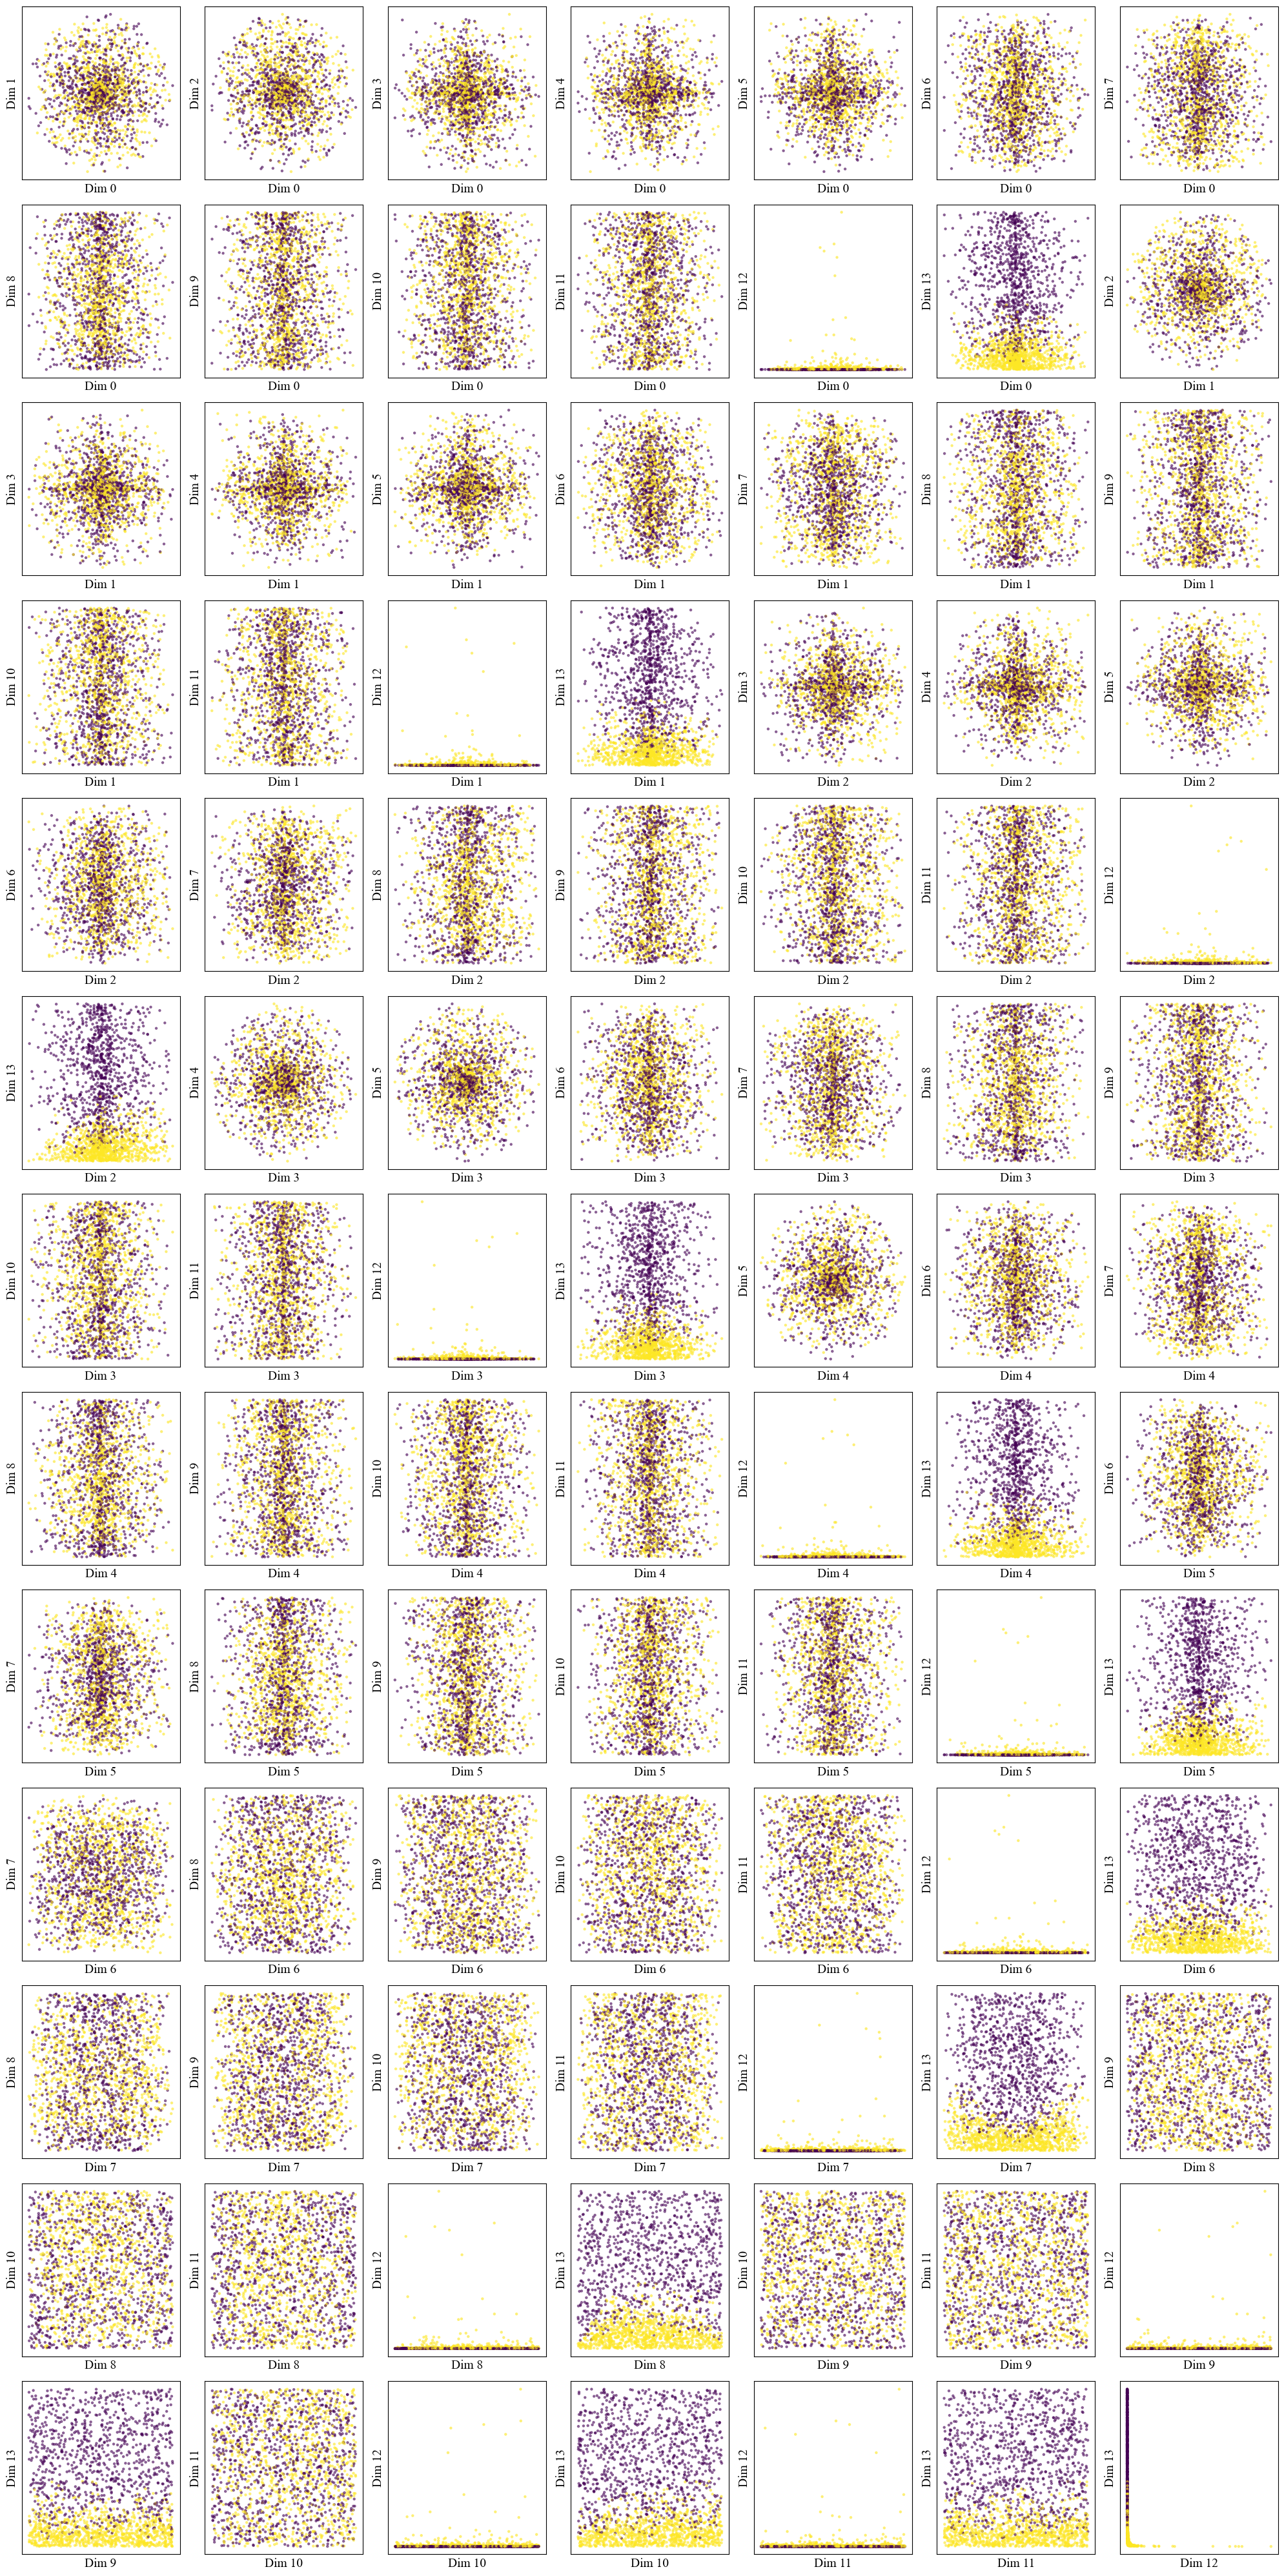

In [20]:
import itertools

# Use a smaller subset for visualization
idx = np.random.choice(len(R), size=2000, replace=False)
data_small = R[idx]
labels_small = y[idx]

dims = range(14)
pairs = list(itertools.combinations(dims, 2))

fig, axes = plt.subplots(13, 7, figsize=(20, 40))  # adjust depending on layout
axes = axes.flatten()

for i, (dim1, dim2) in enumerate(pairs):
    ax = axes[i]
    scatter = ax.scatter(data_small[:, dim1], data_small[:, dim2],
                         c=labels_small, cmap='viridis', s=5, alpha=0.5)
    ax.set_xlabel(f'Dim {dim1}')
    ax.set_ylabel(f'Dim {dim2}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

I will use feature 12 vs feature 6 to visualize the classification algorithm results since there is less overlap between classes

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=14, random_state=42)
T = pca.fit_transform(S)

Text(0, 0.5, 'Explained variance ratio')

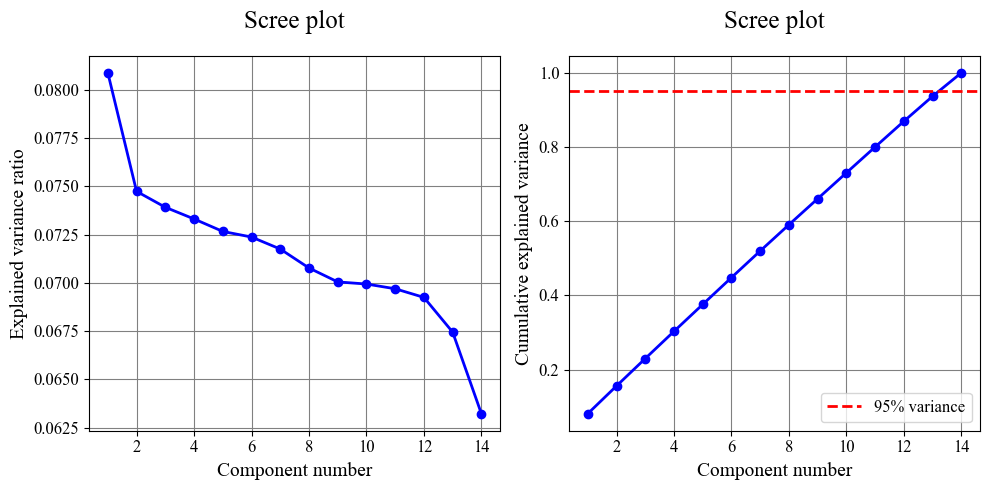

In [9]:
fig, axs = plt.subplots(1, 2)
axs[1].plot(range(1,S.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
axs[1].set_title('Scree plot')
axs[1].set_xlabel('Component number')
axs[1].axhline(0.95, 0, 1, linestyle='--', color='red', label='95% variance')
axs[1].set_ylabel('Cumulative explained variance')
axs[1].legend()

axs[0].plot(range(1,S.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')
axs[0].set_title('Scree plot')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance ratio')

In [10]:
pca = PCA(n_components=14, random_state=42)
T = pca.fit_transform(R)

Text(0, 0.5, 'Explained variance ratio')

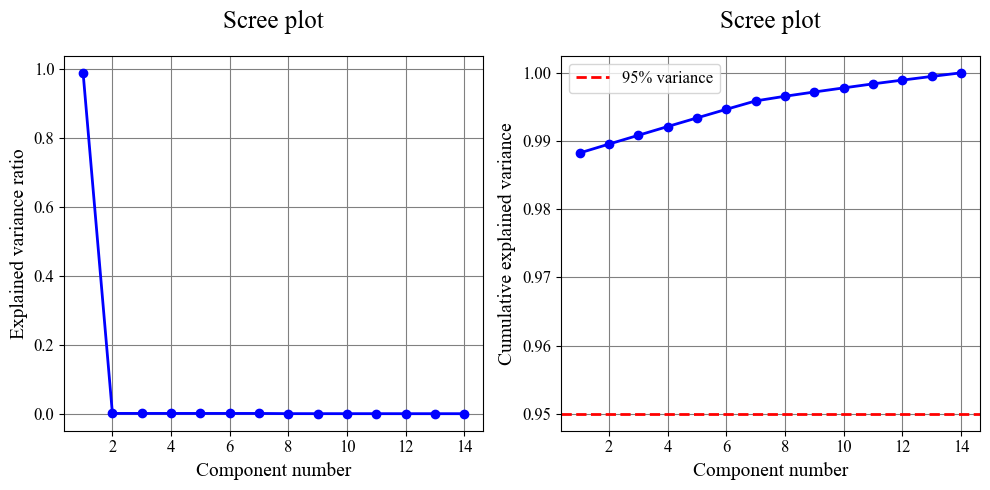

In [11]:
fig, axs = plt.subplots(1, 2)
axs[1].plot(range(1,S.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
axs[1].set_title('Scree plot')
axs[1].set_xlabel('Component number')
axs[1].axhline(0.95, 0, 1, linestyle='--', color='red', label='95% variance')
axs[1].set_ylabel('Cumulative explained variance')
axs[1].legend()

axs[0].plot(range(1,S.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='blue')
axs[0].set_title('Scree plot')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Explained variance ratio')

I could use just the first principal component! I'll see this later one...

## Logistic Regression

In [8]:
from sklearn.model_selection import train_test_split
from Utilities.Classify_vs import evaluate_classifier_over_features, visualize_classification_generic_all, \
evaluate_classifier_over_features_all, visualize_classification_generic, plot_learning_curve
from sklearn.linear_model import LogisticRegression as LR

In [9]:
#S_train, S_test, y_train, y_test = train_test_split(S, y, test_size=0.33, random_state=42)
S_train, S_test, y_train, y_test = train_test_split(R, y, test_size=0.33, random_state=42)

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...
Computing predictions using first 14 features...


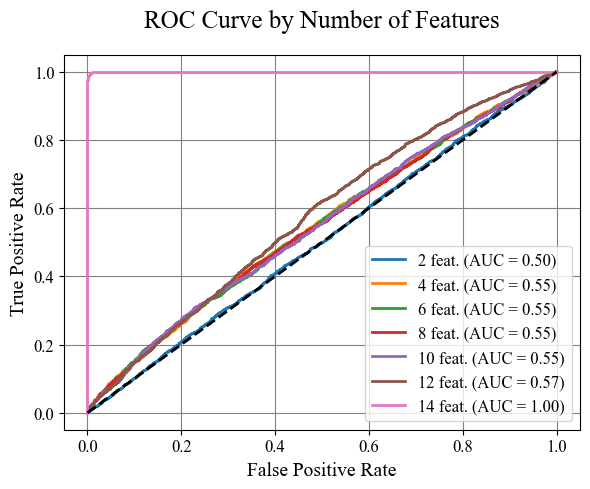

In [22]:
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, LR())

In [10]:
from sklearn.model_selection import learning_curve, KFold
custom_cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(result['best_classifier'], R, y, train_sizes=np.linspace(0.1, 1, 10), cv=custom_cv)

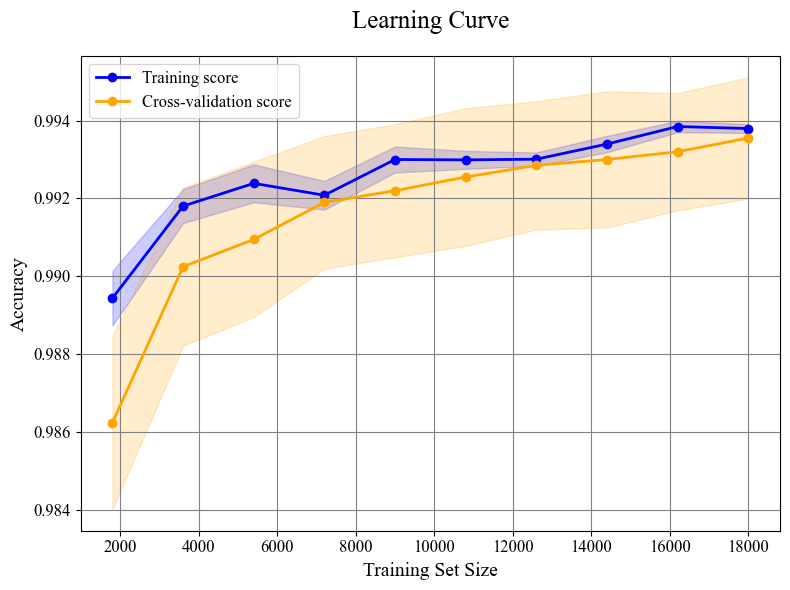

In [24]:
plot_learning_curve(train_sizes, train_scores, test_scores)

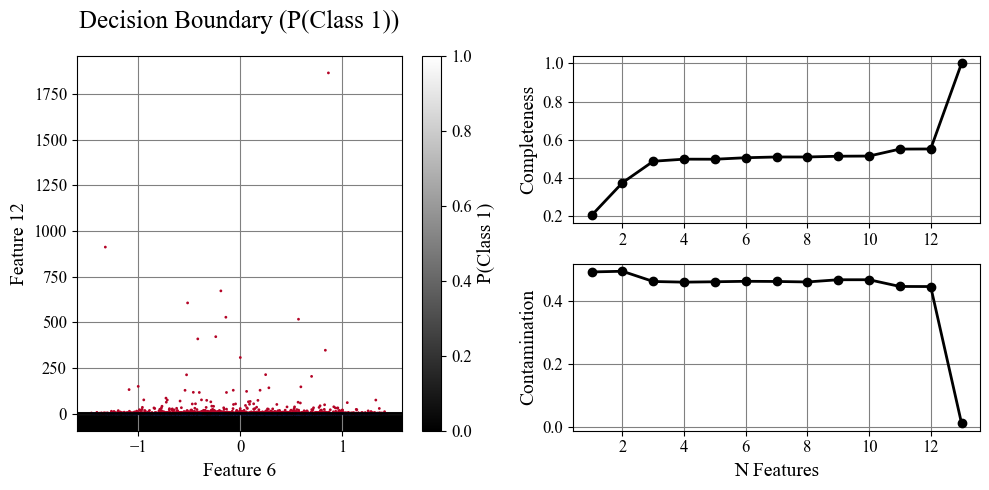

In [25]:
visualize_classification_generic(S_test[:, :result['best_n_features']], y_test, result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], result['contamination'][:result['best_n_features']], f=1, a=12, b=6)

## Support Vector Machine

In [12]:
from sklearn.svm import SVC
clf = 0
clf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True)

Computing predictions on feature count: 14


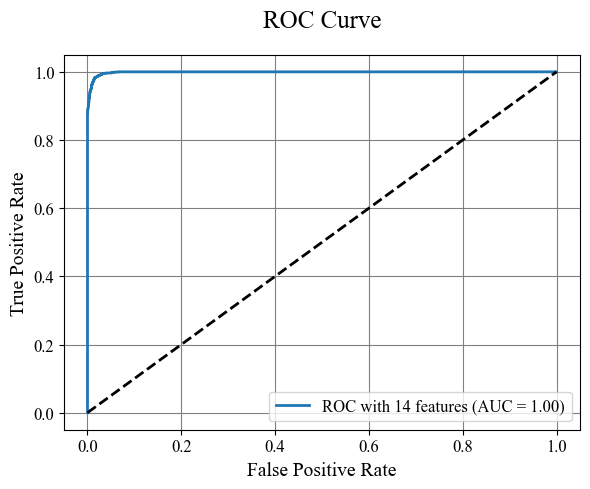

In [17]:
result = 0
result = evaluate_classifier_over_features_all(S_train, S_test, y_train, y_test, clf)

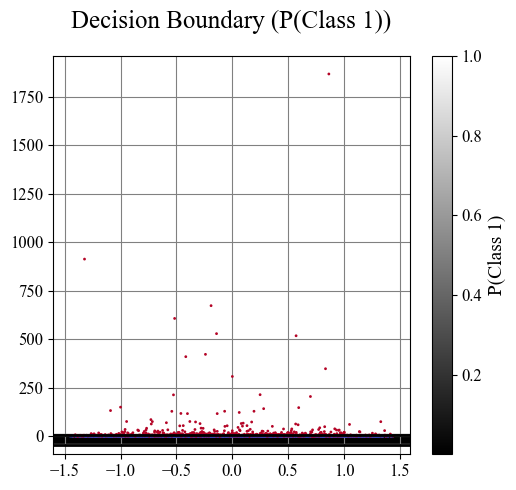

In [18]:
visualize_classification_generic_all(S_test, y_test, 
                                     result['best_classifier'],
                                     result['completeness'],
                                     result['contamination'],
                                     f=1, a=12, b=6, cc=False)

Could not compute completeness, contamination as functions of numer of features, takes too long

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(result['best_classifier'], R, y,  train_sizes=np.linspace(0.1, 1, 10), cv=custom_cv)

In [ ]:
plot_learning_curve(train_sizes, train_scores, test_scores)

NameError: name 'train_sizes' is not defined

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()

Computing predictions using first 1 features...
Computing predictions using first 2 features...
Computing predictions using first 3 features...
Computing predictions using first 4 features...
Computing predictions using first 5 features...
Computing predictions using first 6 features...
Computing predictions using first 7 features...
Computing predictions using first 8 features...
Computing predictions using first 9 features...
Computing predictions using first 10 features...
Computing predictions using first 11 features...
Computing predictions using first 12 features...
Computing predictions using first 13 features...
Computing predictions using first 14 features...


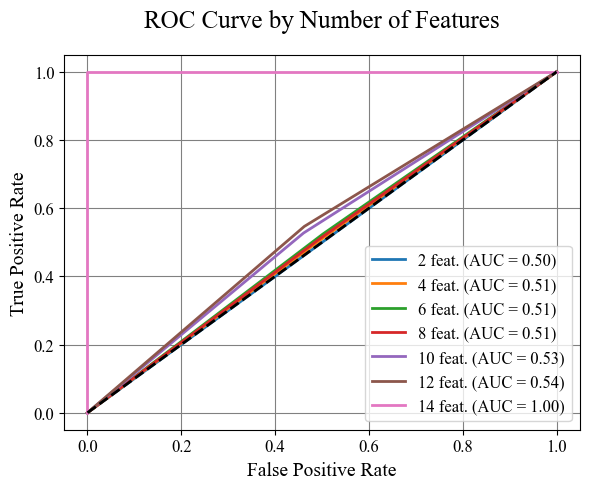

In [20]:
result = 0
result = evaluate_classifier_over_features(S_train, S_test, y_train, y_test, clf)

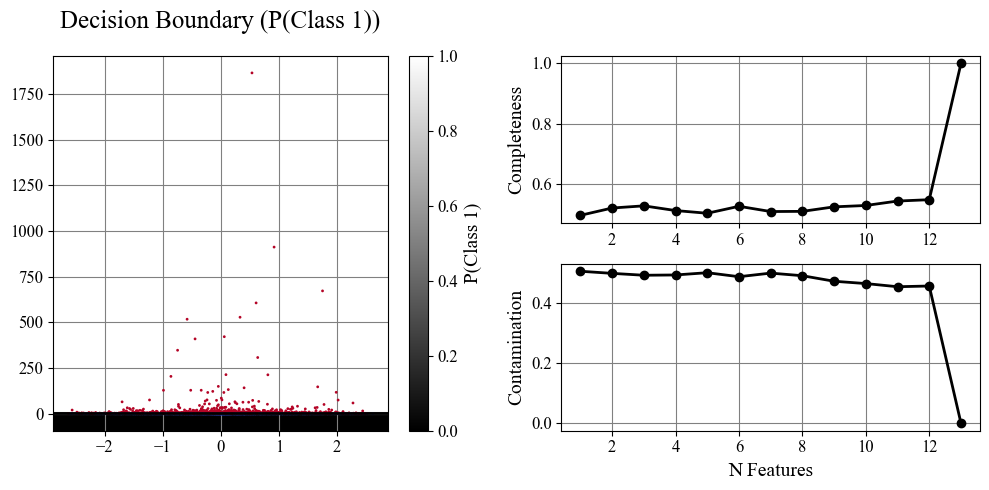

In [41]:
visualize_classification_generic_all(S_test[:, :result['best_n_features']], y_test, 
                                 result['best_classifier'],
                                 result['completeness'][:result['best_n_features']], 
                                 result['contamination'][:result['best_n_features']], 
                                 f=1, a=12, b=0, cc=True)